# Decision Trees
## Original

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, mean_squared_error, roc_auc_score, roc_curve

df = pd.read_csv('scaled_smoking_drinking_dataset.csv')

y_drinking = df.loc[:, 'DRK_YN']
y_smoking = df.loc[:, 'SMK_stat_type_cd']
y_and = y_drinking.astype(int) & y_smoking.astype(int)
y_or = y_drinking.astype(int) | y_smoking.astype(int)
X = df.drop(['DRK_YN', 'SMK_stat_type_cd'], axis=1)

X_train_drinking, X_test_drinking, y_train_drinking, y_test_drinking = train_test_split(X, y_drinking, test_size=0.25, random_state=21)
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X, y_smoking,   test_size=0.25, random_state=21)
X_train_and, X_test_and, y_train_and, y_test_and = train_test_split(X, y_and,   test_size=0.25, random_state=21)
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X, y_or,   test_size=0.25, random_state=21)

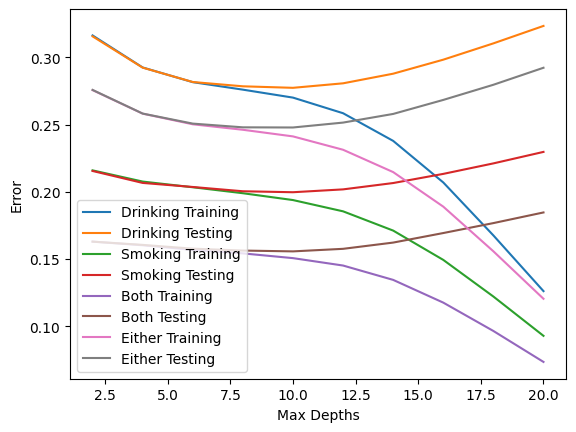

In [ ]:
max_depths = [2,4,6,8,10,12,14,16,18,20]

training_drinking_results = []
testing_drinking_results = []

training_smoking_results = []
testing_smoking_results = []

training_and_results = []
testing_and_results = []

training_or_results = []
testing_or_results = []

for max_depth in max_depths:
  dtreeD1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD1 = dtreeD1.fit(X_train_drinking, y_train_drinking)
  y_predD1 = dtreeD1.predict(X_train_drinking)
  dtreeD2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD2 = dtreeD2.fit(X_train_drinking, y_train_drinking)
  y_predD2 = dtreeD2.predict(X_test_drinking)
  training_drinking_results.append(1 - accuracy_score(y_train_drinking, y_predD1))
  testing_drinking_results.append(1 - accuracy_score(y_test_drinking, y_predD2))

  dtreeS1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS1 = dtreeS1.fit(X_train_smoking, y_train_smoking)
  y_predS1 = dtreeS1.predict(X_train_smoking)
  dtreeS2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS2 = dtreeS2.fit(X_train_smoking, y_train_smoking)
  y_predS2 = dtreeS2.predict(X_test_smoking)
  training_smoking_results.append(1 - accuracy_score(y_train_smoking, y_predS1))
  testing_smoking_results.append(1 - accuracy_score(y_test_smoking, y_predS2))

  dtreeA1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeA1 = dtreeA1.fit(X_train_and, y_train_and)
  y_predA1 = dtreeA1.predict(X_train_and)
  dtreeA2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeA2 = dtreeA2.fit(X_train_and, y_train_and)
  y_predA2 = dtreeA2.predict(X_test_and)
  training_and_results.append(1 - accuracy_score(y_train_and, y_predA1))
  testing_and_results.append(1 - accuracy_score(y_test_and, y_predA2))

  dtreeO1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeO1 = dtreeO1.fit(X_train_or, y_train_or)
  y_predO1 = dtreeO1.predict(X_train_or)
  dtreeO2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeO2 = dtreeO2.fit(X_train_or, y_train_or)
  y_predO2 = dtreeO2.predict(X_test_or)
  training_or_results.append(1 - accuracy_score(y_train_or, y_predO1))
  testing_or_results.append(1 - accuracy_score(y_test_or, y_predO2))

plt.plot(max_depths, training_drinking_results, label="Drinking Training")
plt.plot(max_depths, testing_drinking_results, label="Drinking Testing")
plt.plot(max_depths, training_smoking_results, label="Smoking Training")
plt.plot(max_depths, testing_smoking_results, label="Smoking Testing")
plt.plot(max_depths, training_and_results, label="Both Training")
plt.plot(max_depths, testing_and_results, label="Both Testing")
plt.plot(max_depths, training_or_results, label="Either Training")
plt.plot(max_depths, testing_or_results, label="Either Testing")
plt.legend(loc='best')
plt.xlabel("Max Depths")
plt.ylabel("Error")
plt.show()

In [ ]:
dtreeD = DecisionTreeClassifier(max_depth=10)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD1 = dtreeD.predict(X_train_drinking)
dtreeD = DecisionTreeClassifier(max_depth=10)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD2 = dtreeD.predict(X_test_drinking)

dtreeS = DecisionTreeClassifier(max_depth=10)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS1 = dtreeS.predict(X_train_smoking)
dtreeS = DecisionTreeClassifier(max_depth=10)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS2 = dtreeS.predict(X_test_smoking)

dtreeA = DecisionTreeClassifier(max_depth=10)
dtreeA = dtreeA.fit(X_train_and, y_train_and)
y_predA1 = dtreeA.predict(X_train_and)
dtreeA = DecisionTreeClassifier(max_depth=10)
dtreeA = dtreeA.fit(X_train_and, y_train_and)
y_predA2 = dtreeA.predict(X_test_and)

dtreeO = DecisionTreeClassifier(max_depth=10)
dtreeO = dtreeO.fit(X_train_or, y_train_or)
y_predO1 = dtreeO.predict(X_train_or)
dtreeO = DecisionTreeClassifier(max_depth=10)
dtreeO = dtreeO.fit(X_train_or, y_train_or)
y_predO2 = dtreeO.predict(X_test_or)

print("Drinking:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_drinking, y_predD1), accuracy_score(y_train_drinking, y_predD1),
                                                        f1_score(y_train_drinking, y_predD1), roc_auc_score(y_train_drinking, y_predD1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_drinking, y_predD2), accuracy_score(y_test_drinking, y_predD2),
                                                        f1_score(y_test_drinking, y_predD2), roc_auc_score(y_test_drinking, y_predD2)))

print("Smoking:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predS1), accuracy_score(y_train_smoking, y_predS1),
                                                        f1_score(y_train_smoking, y_predS1), roc_auc_score(y_train_smoking, y_predS1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predS2), accuracy_score(y_test_smoking, y_predS2),
                                                        f1_score(y_test_smoking, y_predS2), roc_auc_score(y_test_smoking, y_predS2)))

print("Both:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predA1), accuracy_score(y_train_smoking, y_predA1),
                                                        f1_score(y_train_smoking, y_predA1), roc_auc_score(y_train_smoking, y_predA1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predA2), accuracy_score(y_test_smoking, y_predA2),
                                                        f1_score(y_test_smoking, y_predA2), roc_auc_score(y_test_smoking, y_predA2)))

print("Either:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predO1), accuracy_score(y_train_smoking, y_predO1),
                                                        f1_score(y_train_smoking, y_predO1), roc_auc_score(y_train_smoking, y_predO1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predO2), accuracy_score(y_test_smoking, y_predO2),
                                                        f1_score(y_test_smoking, y_predO2), roc_auc_score(y_test_smoking, y_predO2)))

Drinking:
Training Set:
Error: 0.26998, Accuracy: 0.73002, F1: 0.73363, AUC: 0.73002
Test Set:
Error: 0.27724, Accuracy: 0.72276, F1: 0.72681, AUC: 0.72278
Smoking:
Training Set:
Error: 0.19387, Accuracy: 0.80613, F1: 0.40003, AUC: 0.62251
Test Set:
Error: 0.19966, Accuracy: 0.80034, F1: 0.38016, AUC: 0.61313
Both:
Training Set:
Error: 0.19807, Accuracy: 0.80193, F1: 0.30711, AUC: 0.58504
Test Set:
Error: 0.20176, Accuracy: 0.79824, F1: 0.29373, AUC: 0.57936
Either:
Training Set:
Error: 0.39280, Accuracy: 0.60720, F1: 0.50521, AUC: 0.72368
Test Set:
Error: 0.39670, Accuracy: 0.60330, F1: 0.50130, AUC: 0.72006


## 50 and Under

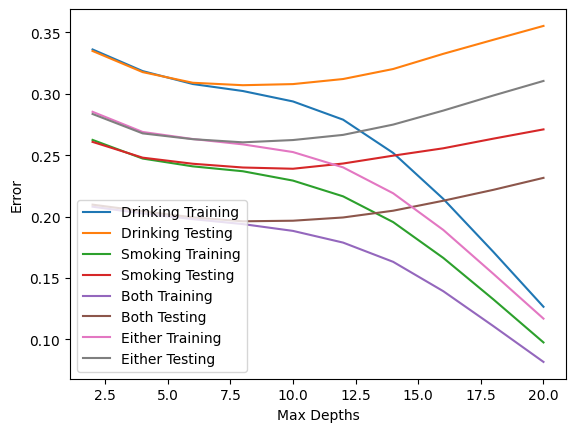

In [ ]:
df = pd.read_csv('scaled_smoking_drinking_dataset_50_and_under.csv')

y_drinking = df.loc[:, 'DRK_YN']
y_smoking = df.loc[:, 'SMK_stat_type_cd']
y_and = y_drinking.astype(int) & y_smoking.astype(int)
y_or = y_drinking.astype(int) | y_smoking.astype(int)
X = df.drop(['DRK_YN', 'SMK_stat_type_cd'], axis=1)

X_train_drinking, X_test_drinking, y_train_drinking, y_test_drinking = train_test_split(X, y_drinking, test_size=0.25, random_state=21)
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X, y_smoking,   test_size=0.25, random_state=21)
X_train_and, X_test_and, y_train_and, y_test_and = train_test_split(X, y_and,   test_size=0.25, random_state=21)
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X, y_or,   test_size=0.25, random_state=21)

max_depths = [2,4,6,8,10,12,14,16,18,20]

training_drinking_results = []
testing_drinking_results = []

training_smoking_results = []
testing_smoking_results = []

training_and_results = []
testing_and_results = []

training_or_results = []
testing_or_results = []

for max_depth in max_depths:
  dtreeD1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD1 = dtreeD1.fit(X_train_drinking, y_train_drinking)
  y_predD1 = dtreeD1.predict(X_train_drinking)
  dtreeD2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD2 = dtreeD2.fit(X_train_drinking, y_train_drinking)
  y_predD2 = dtreeD2.predict(X_test_drinking)
  training_drinking_results.append(1 - accuracy_score(y_train_drinking, y_predD1))
  testing_drinking_results.append(1 - accuracy_score(y_test_drinking, y_predD2))

  dtreeS1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS1 = dtreeS1.fit(X_train_smoking, y_train_smoking)
  y_predS1 = dtreeS1.predict(X_train_smoking)
  dtreeS2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS2 = dtreeS2.fit(X_train_smoking, y_train_smoking)
  y_predS2 = dtreeS2.predict(X_test_smoking)
  training_smoking_results.append(1 - accuracy_score(y_train_smoking, y_predS1))
  testing_smoking_results.append(1 - accuracy_score(y_test_smoking, y_predS2))

  dtreeA1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeA1 = dtreeA1.fit(X_train_and, y_train_and)
  y_predA1 = dtreeA1.predict(X_train_and)
  dtreeA2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeA2 = dtreeA2.fit(X_train_and, y_train_and)
  y_predA2 = dtreeA2.predict(X_test_and)
  training_and_results.append(1 - accuracy_score(y_train_and, y_predA1))
  testing_and_results.append(1 - accuracy_score(y_test_and, y_predA2))

  dtreeO1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeO1 = dtreeO1.fit(X_train_or, y_train_or)
  y_predO1 = dtreeO1.predict(X_train_or)
  dtreeO2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeO2 = dtreeO2.fit(X_train_or, y_train_or)
  y_predO2 = dtreeO2.predict(X_test_or)
  training_or_results.append(1 - accuracy_score(y_train_or, y_predO1))
  testing_or_results.append(1 - accuracy_score(y_test_or, y_predO2))

plt.plot(max_depths, training_drinking_results, label="Drinking Training")
plt.plot(max_depths, testing_drinking_results, label="Drinking Testing")
plt.plot(max_depths, training_smoking_results, label="Smoking Training")
plt.plot(max_depths, testing_smoking_results, label="Smoking Testing")
plt.plot(max_depths, training_and_results, label="Both Training")
plt.plot(max_depths, testing_and_results, label="Both Testing")
plt.plot(max_depths, training_or_results, label="Either Training")
plt.plot(max_depths, testing_or_results, label="Either Testing")
plt.legend(loc='best')
plt.xlabel("Max Depths")
plt.ylabel("Error")
plt.show()

In [ ]:
dtreeD = DecisionTreeClassifier(max_depth=8)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD1 = dtreeD.predict(X_train_drinking)
dtreeD = DecisionTreeClassifier(max_depth=8)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD2 = dtreeD.predict(X_test_drinking)

dtreeS = DecisionTreeClassifier(max_depth=10)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS1 = dtreeS.predict(X_train_smoking)
dtreeS = DecisionTreeClassifier(max_depth=10)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS2 = dtreeS.predict(X_test_smoking)

dtreeA = DecisionTreeClassifier(max_depth=8)
dtreeA = dtreeA.fit(X_train_and, y_train_and)
y_predA1 = dtreeA.predict(X_train_and)
dtreeA = DecisionTreeClassifier(max_depth=8)
dtreeA = dtreeA.fit(X_train_and, y_train_and)
y_predA2 = dtreeA.predict(X_test_and)

dtreeO = DecisionTreeClassifier(max_depth=8)
dtreeO = dtreeO.fit(X_train_or, y_train_or)
y_predO1 = dtreeO.predict(X_train_or)
dtreeO = DecisionTreeClassifier(max_depth=8)
dtreeO = dtreeO.fit(X_train_or, y_train_or)
y_predO2 = dtreeO.predict(X_test_or)

print("Drinking:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_drinking, y_predD1), accuracy_score(y_train_drinking, y_predD1),
                                                        f1_score(y_train_drinking, y_predD1), roc_auc_score(y_train_drinking, y_predD1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_drinking, y_predD2), accuracy_score(y_test_drinking, y_predD2),
                                                        f1_score(y_test_drinking, y_predD2), roc_auc_score(y_test_drinking, y_predD2)))

print("Smoking:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predS1), accuracy_score(y_train_smoking, y_predS1),
                                                        f1_score(y_train_smoking, y_predS1), roc_auc_score(y_train_smoking, y_predS1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predS2), accuracy_score(y_test_smoking, y_predS2),
                                                        f1_score(y_test_smoking, y_predS2), roc_auc_score(y_test_smoking, y_predS2)))

print("Both:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predA1), accuracy_score(y_train_smoking, y_predA1),
                                                        f1_score(y_train_smoking, y_predA1), roc_auc_score(y_train_smoking, y_predA1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predA2), accuracy_score(y_test_smoking, y_predA2),
                                                        f1_score(y_test_smoking, y_predA2), roc_auc_score(y_test_smoking, y_predA2)))

print("Either:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predO1), accuracy_score(y_train_smoking, y_predO1),
                                                        f1_score(y_train_smoking, y_predO1), roc_auc_score(y_train_smoking, y_predO1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predO2), accuracy_score(y_test_smoking, y_predO2),
                                                        f1_score(y_test_smoking, y_predO2), roc_auc_score(y_test_smoking, y_predO2)))

Drinking:
Training Set:
Error: 0.30225, Accuracy: 0.69775, F1: 0.75767, AUC: 0.67516
Test Set:
Error: 0.30699, Accuracy: 0.69301, F1: 0.75443, AUC: 0.66969
Smoking:
Training Set:
Error: 0.22926, Accuracy: 0.77074, F1: 0.47880, AUC: 0.65150
Test Set:
Error: 0.23885, Accuracy: 0.76115, F1: 0.46114, AUC: 0.64101
Both:
Training Set:
Error: 0.24278, Accuracy: 0.75722, F1: 0.31322, AUC: 0.58165
Test Set:
Error: 0.24475, Accuracy: 0.75525, F1: 0.31213, AUC: 0.58095
Either:
Training Set:
Error: 0.46301, Accuracy: 0.53699, F1: 0.52386, AUC: 0.67419
Test Set:
Error: 0.46128, Accuracy: 0.53872, F1: 0.52637, AUC: 0.67466


## Above 50

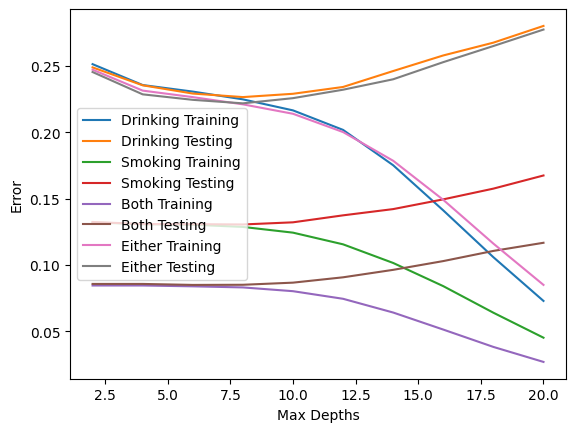

In [ ]:
df = pd.read_csv('scaled_smoking_drinking_dataset_above_50.csv')

y_drinking = df.loc[:, 'DRK_YN']
y_smoking = df.loc[:, 'SMK_stat_type_cd']
y_and = y_drinking.astype(int) & y_smoking.astype(int)
y_or = y_drinking.astype(int) | y_smoking.astype(int)
X = df.drop(['DRK_YN', 'SMK_stat_type_cd'], axis=1)

X_train_drinking, X_test_drinking, y_train_drinking, y_test_drinking = train_test_split(X, y_drinking, test_size=0.25, random_state=21)
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X, y_smoking,   test_size=0.25, random_state=21)
X_train_and, X_test_and, y_train_and, y_test_and = train_test_split(X, y_and,   test_size=0.25, random_state=21)
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X, y_or,   test_size=0.25, random_state=21)

max_depths = [2,4,6,8,10,12,14,16,18,20]

training_drinking_results = []
testing_drinking_results = []

training_smoking_results = []
testing_smoking_results = []

training_and_results = []
testing_and_results = []

training_or_results = []
testing_or_results = []

for max_depth in max_depths:
  dtreeD1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD1 = dtreeD1.fit(X_train_drinking, y_train_drinking)
  y_predD1 = dtreeD1.predict(X_train_drinking)
  dtreeD2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeD2 = dtreeD2.fit(X_train_drinking, y_train_drinking)
  y_predD2 = dtreeD2.predict(X_test_drinking)
  training_drinking_results.append(1 - accuracy_score(y_train_drinking, y_predD1))
  testing_drinking_results.append(1 - accuracy_score(y_test_drinking, y_predD2))

  dtreeS1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS1 = dtreeS1.fit(X_train_smoking, y_train_smoking)
  y_predS1 = dtreeS1.predict(X_train_smoking)
  dtreeS2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeS2 = dtreeS2.fit(X_train_smoking, y_train_smoking)
  y_predS2 = dtreeS2.predict(X_test_smoking)
  training_smoking_results.append(1 - accuracy_score(y_train_smoking, y_predS1))
  testing_smoking_results.append(1 - accuracy_score(y_test_smoking, y_predS2))

  dtreeA1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeA1 = dtreeA1.fit(X_train_and, y_train_and)
  y_predA1 = dtreeA1.predict(X_train_and)
  dtreeA2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeA2 = dtreeA2.fit(X_train_and, y_train_and)
  y_predA2 = dtreeA2.predict(X_test_and)
  training_and_results.append(1 - accuracy_score(y_train_and, y_predA1))
  testing_and_results.append(1 - accuracy_score(y_test_and, y_predA2))

  dtreeO1 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeO1 = dtreeO1.fit(X_train_or, y_train_or)
  y_predO1 = dtreeO1.predict(X_train_or)
  dtreeO2 = DecisionTreeClassifier(max_depth=max_depth)
  dtreeO2 = dtreeO2.fit(X_train_or, y_train_or)
  y_predO2 = dtreeO2.predict(X_test_or)
  training_or_results.append(1 - accuracy_score(y_train_or, y_predO1))
  testing_or_results.append(1 - accuracy_score(y_test_or, y_predO2))

plt.plot(max_depths, training_drinking_results, label="Drinking Training")
plt.plot(max_depths, testing_drinking_results, label="Drinking Testing")
plt.plot(max_depths, training_smoking_results, label="Smoking Training")
plt.plot(max_depths, testing_smoking_results, label="Smoking Testing")
plt.plot(max_depths, training_and_results, label="Both Training")
plt.plot(max_depths, testing_and_results, label="Both Testing")
plt.plot(max_depths, training_or_results, label="Either Training")
plt.plot(max_depths, testing_or_results, label="Either Testing")
plt.legend(loc='best')
plt.xlabel("Max Depths")
plt.ylabel("Error")
plt.show()

In [15]:
dtreeD = DecisionTreeClassifier(max_depth=8)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD1 = dtreeD.predict(X_train_drinking)
dtreeD = DecisionTreeClassifier(max_depth=8)
dtreeD = dtreeD.fit(X_train_drinking, y_train_drinking)
y_predD2 = dtreeD.predict(X_test_drinking)

dtreeS = DecisionTreeClassifier(max_depth=8)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS1 = dtreeS.predict(X_train_smoking)
dtreeS = DecisionTreeClassifier(max_depth=8)
dtreeS = dtreeS.fit(X_train_smoking, y_train_smoking)
y_predS2 = dtreeS.predict(X_test_smoking)

dtreeA = DecisionTreeClassifier(max_depth=8)
dtreeA = dtreeA.fit(X_train_and, y_train_and)
y_predA1 = dtreeA.predict(X_train_and)
dtreeA = DecisionTreeClassifier(max_depth=8)
dtreeA = dtreeA.fit(X_train_and, y_train_and)
y_predA2 = dtreeA.predict(X_test_and)

dtreeO = DecisionTreeClassifier(max_depth=8)
dtreeO = dtreeO.fit(X_train_or, y_train_or)
y_predO1 = dtreeO.predict(X_train_or)
dtreeO = DecisionTreeClassifier(max_depth=8)
dtreeO = dtreeO.fit(X_train_or, y_train_or)
y_predO2 = dtreeO.predict(X_test_or)

print("Drinking:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_drinking, y_predD1), accuracy_score(y_train_drinking, y_predD1),
                                                        f1_score(y_train_drinking, y_predD1), roc_auc_score(y_train_drinking, y_predD1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_drinking, y_predD2), accuracy_score(y_test_drinking, y_predD2),
                                                        f1_score(y_test_drinking, y_predD2), roc_auc_score(y_test_drinking, y_predD2)))

print("Smoking:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predS1), accuracy_score(y_train_smoking, y_predS1),
                                                        f1_score(y_train_smoking, y_predS1), roc_auc_score(y_train_smoking, y_predS1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predS2), accuracy_score(y_test_smoking, y_predS2),
                                                        f1_score(y_test_smoking, y_predS2), roc_auc_score(y_test_smoking, y_predS2)))

print("Both:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predA1), accuracy_score(y_train_smoking, y_predA1),
                                                        f1_score(y_train_smoking, y_predA1), roc_auc_score(y_train_smoking, y_predA1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predA2), accuracy_score(y_test_smoking, y_predA2),
                                                        f1_score(y_test_smoking, y_predA2), roc_auc_score(y_test_smoking, y_predA2)))

print("Either:")
print("Training Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_train_smoking, y_predO1), accuracy_score(y_train_smoking, y_predO1),
                                                        f1_score(y_train_smoking, y_predO1), roc_auc_score(y_train_smoking, y_predO1)))
print("Test Set:")
print("Error: {:.5f}, Accuracy: {:.5f}, F1: {:.5f}, AUC: {:.5f}".format(1 - accuracy_score(y_test_smoking, y_predO2), accuracy_score(y_test_smoking, y_predO2),
                                                        f1_score(y_test_smoking, y_predO2), roc_auc_score(y_test_smoking, y_predO2)))

Drinking:
Training Set:
Error: 0.22490, Accuracy: 0.77510, F1: 0.62916, AUC: 0.72407
Test Set:
Error: 0.22657, Accuracy: 0.77343, F1: 0.62546, AUC: 0.72187
Smoking:
Training Set:
Error: 0.12873, Accuracy: 0.87127, F1: 0.14295, AUC: 0.53642
Test Set:
Error: 0.13049, Accuracy: 0.86951, F1: 0.13046, AUC: 0.53244
Both:
Training Set:
Error: 0.13005, Accuracy: 0.86995, F1: 0.06220, AUC: 0.51506
Test Set:
Error: 0.13111, Accuracy: 0.86889, F1: 0.05549, AUC: 0.51309
Either:
Training Set:
Error: 0.29135, Accuracy: 0.70865, F1: 0.42676, AUC: 0.75600
Test Set:
Error: 0.29170, Accuracy: 0.70830, F1: 0.42592, AUC: 0.75434


# Naive Bayes Model
## Original

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train_drinking, y_train_drinking)
y_pred = gnb.predict(X_test_drinking)
print("Naive Bayes - Drinking")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_drinking, y_pred), precision_score(y_test_drinking, y_pred),
                                                                            recall_score(y_test_drinking, y_pred), f1_score(y_test_drinking, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_smoking, y_test_smoking)
y_pred = gnb.predict(X_test_smoking)
print("Naive Bayes - Smoking")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_smoking, y_pred), precision_score(y_test_smoking, y_pred),
                                                                            recall_score(y_test_smoking, y_pred), f1_score(y_test_smoking, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_and, y_test_and)
y_pred = gnb.predict(X_test_and)
print("Naive Bayes - Both")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_and, y_pred), precision_score(y_test_and, y_pred),
                                                                            recall_score(y_test_and, y_pred), f1_score(y_test_and, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_smoking, y_test_smoking)
y_pred = gnb.predict(X_test_smoking)
print("Naive Bayes - Either")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_or, y_pred), precision_score(y_test_or, y_pred),
                                                                            recall_score(y_test_or, y_pred), f1_score(y_test_or, y_pred)))

Naive Bayes - Drinking
Testing Set: Accuracy: 0.68566, Precision: 0.69085, Recall: 0.67065, F1: 0.68060
Naive Bayes - Smoking
Testing Set: Accuracy: 0.72225, Precision: 0.41311, Recall: 0.68685, F1: 0.51592
Naive Bayes - Both
Testing Set: Accuracy: 0.72763, Precision: 0.33640, Recall: 0.69005, F1: 0.45230
Naive Bayes - Either
Testing Set: Accuracy: 0.66860, Precision: 0.80769, Recall: 0.52435, F1: 0.63589


## 50 and Under

In [ ]:
df = pd.read_csv('scaled_smoking_drinking_dataset_50_and_under.csv')

y_drinking = df.loc[:, 'DRK_YN']
y_smoking = df.loc[:, 'SMK_stat_type_cd']
y_and = y_drinking.astype(int) & y_smoking.astype(int)
y_or = y_drinking.astype(int) | y_smoking.astype(int)
X = df.drop(['DRK_YN', 'SMK_stat_type_cd'], axis=1)

X_train_drinking, X_test_drinking, y_train_drinking, y_test_drinking = train_test_split(X, y_drinking, test_size=0.25, random_state=21)
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X, y_smoking,   test_size=0.25, random_state=21)
X_train_and, X_test_and, y_train_and, y_test_and = train_test_split(X, y_and,   test_size=0.25, random_state=21)
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X, y_or,   test_size=0.25, random_state=21)

gnb = GaussianNB()
gnb = gnb.fit(X_train_drinking, y_train_drinking)
y_pred = gnb.predict(X_test_drinking)
print("Naive Bayes - Drinking")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_drinking, y_pred), precision_score(y_test_drinking, y_pred),
                                                                            recall_score(y_test_drinking, y_pred), f1_score(y_test_drinking, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_smoking, y_test_smoking)
y_pred = gnb.predict(X_test_smoking)
print("Naive Bayes - Smoking")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_smoking, y_pred), precision_score(y_test_smoking, y_pred),
                                                                            recall_score(y_test_smoking, y_pred), f1_score(y_test_smoking, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_and, y_test_and)
y_pred = gnb.predict(X_test_and)
print("Naive Bayes - Both")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_and, y_pred), precision_score(y_test_and, y_pred),
                                                                            recall_score(y_test_and, y_pred), f1_score(y_test_and, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_smoking, y_test_smoking)
y_pred = gnb.predict(X_test_smoking)
print("Naive Bayes - Either")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_or, y_pred), precision_score(y_test_or, y_pred),
                                                                            recall_score(y_test_or, y_pred), f1_score(y_test_or, y_pred)))

Naive Bayes - Drinking
Testing Set: Accuracy: 0.65175, Precision: 0.73895, Recall: 0.64343, F1: 0.68789
Naive Bayes - Smoking
Testing Set: Accuracy: 0.69125, Precision: 0.44910, Recall: 0.71505, F1: 0.55170
Naive Bayes - Both
Testing Set: Accuracy: 0.66702, Precision: 0.36283, Recall: 0.77793, F1: 0.49485
Naive Bayes - Either
Testing Set: Accuracy: 0.63030, Precision: 0.83425, Recall: 0.54086, F1: 0.65626


## Above 50

In [ ]:
df = pd.read_csv('scaled_smoking_drinking_dataset_above_50.csv')

y_drinking = df.loc[:, 'DRK_YN']
y_smoking = df.loc[:, 'SMK_stat_type_cd']
y_and = y_drinking.astype(int) & y_smoking.astype(int)
y_or = y_drinking.astype(int) | y_smoking.astype(int)
X = df.drop(['DRK_YN', 'SMK_stat_type_cd'], axis=1)

X_train_drinking, X_test_drinking, y_train_drinking, y_test_drinking = train_test_split(X, y_drinking, test_size=0.25, random_state=21)
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X, y_smoking,   test_size=0.25, random_state=21)
X_train_and, X_test_and, y_train_and, y_test_and = train_test_split(X, y_and,   test_size=0.25, random_state=21)
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X, y_or,   test_size=0.25, random_state=21)

gnb = GaussianNB()
gnb = gnb.fit(X_train_drinking, y_train_drinking)
y_pred = gnb.predict(X_test_drinking)
print("Naive Bayes - Drinking")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_drinking, y_pred), precision_score(y_test_drinking, y_pred),
                                                                            recall_score(y_test_drinking, y_pred), f1_score(y_test_drinking, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_smoking, y_test_smoking)
y_pred = gnb.predict(X_test_smoking)
print("Naive Bayes - Smoking")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_smoking, y_pred), precision_score(y_test_smoking, y_pred),
                                                                            recall_score(y_test_smoking, y_pred), f1_score(y_test_smoking, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_and, y_test_and)
y_pred = gnb.predict(X_test_and)
print("Naive Bayes - Both")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_and, y_pred), precision_score(y_test_and, y_pred),
                                                                            recall_score(y_test_and, y_pred), f1_score(y_test_and, y_pred)))
gnb = GaussianNB()
gnb = gnb.fit(X_test_smoking, y_test_smoking)
y_pred = gnb.predict(X_test_smoking)
print("Naive Bayes - Either")
print("Testing Set: Accuracy: {:.5f}, Precision: {:.5f}, Recall: {:.5f}, F1: {:.5f}".format(accuracy_score(y_test_or, y_pred), precision_score(y_test_or, y_pred),
                                                                            recall_score(y_test_or, y_pred), f1_score(y_test_or, y_pred)))

Naive Bayes - Drinking
Testing Set: Accuracy: 0.73833, Precision: 0.60288, Recall: 0.63322, F1: 0.61768
Naive Bayes - Smoking
Testing Set: Accuracy: 0.79252, Precision: 0.30480, Recall: 0.44225, F1: 0.36088
Naive Bayes - Both
Testing Set: Accuracy: 0.83615, Precision: 0.23926, Recall: 0.41779, F1: 0.30427
Naive Bayes - Either
Testing Set: Accuracy: 0.70113, Precision: 0.71239, Recall: 0.35981, F1: 0.47813
